In [2]:
import numpy as np
import scipy.optimize

In [3]:
def cole_turb(e_d):
    return (-2*np.log10(e_d/3.7))**-2

def coleb(Re,e_d):
    eqf = lambda f : f**-0.5+2*np.log10(e_d/3.7+2.51/Re/f**0.5)
    ffact = scipy.optimize.newton(eqf,cole_turb(e_d))
    return ffact

In [11]:
Ds = 102.3 *10**-3 # m
Ats = Ds**2*np.pi/4
Dd = 102.3 *10**-3 # m
Atd = Dd**2*np.pi/4

Ls = 2 # m
Ld = 400 # m

e = 4.6*10**-5 #m
e_dd = e/Dd # rugosidad relativa linea de descarga
e_ds = e/Ds # rugosidad relativa linea de succion

g=9.81 # m/s2
mu = 10**-3 # Pa.s
rho = 10**3 # kg/m3
Q = 800*10**-3/60 # m3/s
za = 0
zb = 80 # m

def ha_func(q):
    
    vd = q/Atd
    vs = q/Ats
    # perdidas menores
    # succion
    fts = cole_turb(e_ds)
    k1 = 75*fts
    k2 = 30*fts
    
    hlms = vs**2/2/g*(k1+k2)
    
    # descarga
    ftd = cole_turb(e_dd)
    k3 = 30*ftd
    k4=100*ftd
    k5 = 8*ftd
    k6=30*ftd
    k7 = 1

    hlmd = vd**2/2/g*(k3+k4+k5+k6+k7)
    
    #total
    hlm = hlms+hlmd

    # perdidas mayores
    # succion
    Res = rho*vs*Ds/mu
    fs = coleb(Res,e_ds)
    hls = vs**2/2/g*fs*Ls/Ds

    # descarga
    
    Red = rho*vd*Dd/mu
    fd = coleb(Red,e_dd)
    hld = vd**2/2/g*fd*Ld/Dd
    
    #total
    hl = hld+hls
    
    ha = zb-za+hl+hlm
    return ha

ha_req = ha_func(Q)

In [12]:
print(ha_req)

90.70070536381826


In [15]:
#bomba: N 40-250

Ds = 62.7 *10**-3 # m
Ats = Ds**2*np.pi/4
Dd1 = 40.9 * 10**-3 # Diametro de la descarga de la bomba: se requiere 
Atd1 = Dd1**2*np.pi/4

Dd = 102.3 *10**-3 # m
Atd = Dd**2*np.pi/4

Ls = 2 # m
Ld = 400 # m

e = 4.6*10**-5 #m
e_dd = e/Dd # rugosidad relativa linea de descarga
e_ds = e/Ds # rugosidad relativa linea de succion

g=9.81 # m/s2
mu = 10**-3 # Pa.s
rho = 10**3 # kg/m3
Q = 800*10**-3/60 # m3/s
za = 0
zb = 80 # m

def ha_func(q):
    
    vd1 = q /Atd1
    vd = q/Atd
    vs = q/Ats


    # perdidas mayores
    # succion
    Res = rho*vs*Ds/mu
    fs = coleb(Res,e_ds)
    hls = vs**2/2/g*fs*Ls/Ds

    # descarga
    
    Red = rho*vd*Dd/mu
    fd = coleb(Red,e_dd)
    hld = vd**2/2/g*fd*Ld/Dd
    
    #total
    hl = hld+hls
    
    # perdidas menores
    # succion
    fts = cole_turb(e_ds)
    k1 = 75*fts
    k2 = 30*fts
    
    hlms = vs**2/2/g*(k1+k2)
    
    # descarga
    ftd = cole_turb(e_dd)
    k3 = 30*ftd
    k4=100*ftd
    k5 = 8*ftd
    k6=30*ftd
    k7 = 1
    k8 = 0.48
    
    hlmd = vd**2/2/g*(k3+k4+k5+k6+k7)+vd1**2/2/g*k8
    
    #total
    hlm = hlms+hlmd
    
    ha = zb-za+hl+hlm
    return ha

ha_req = ha_func(Q)


In [16]:
# NPSH
hvp = 2.41/9.81
hs = - 2 
hf = 1.97
hsp = 101/9.81
NPSHA= hsp+hs - hf -hvp
print(NPSHA)

6.079949031600407


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
%matplotlib inline 

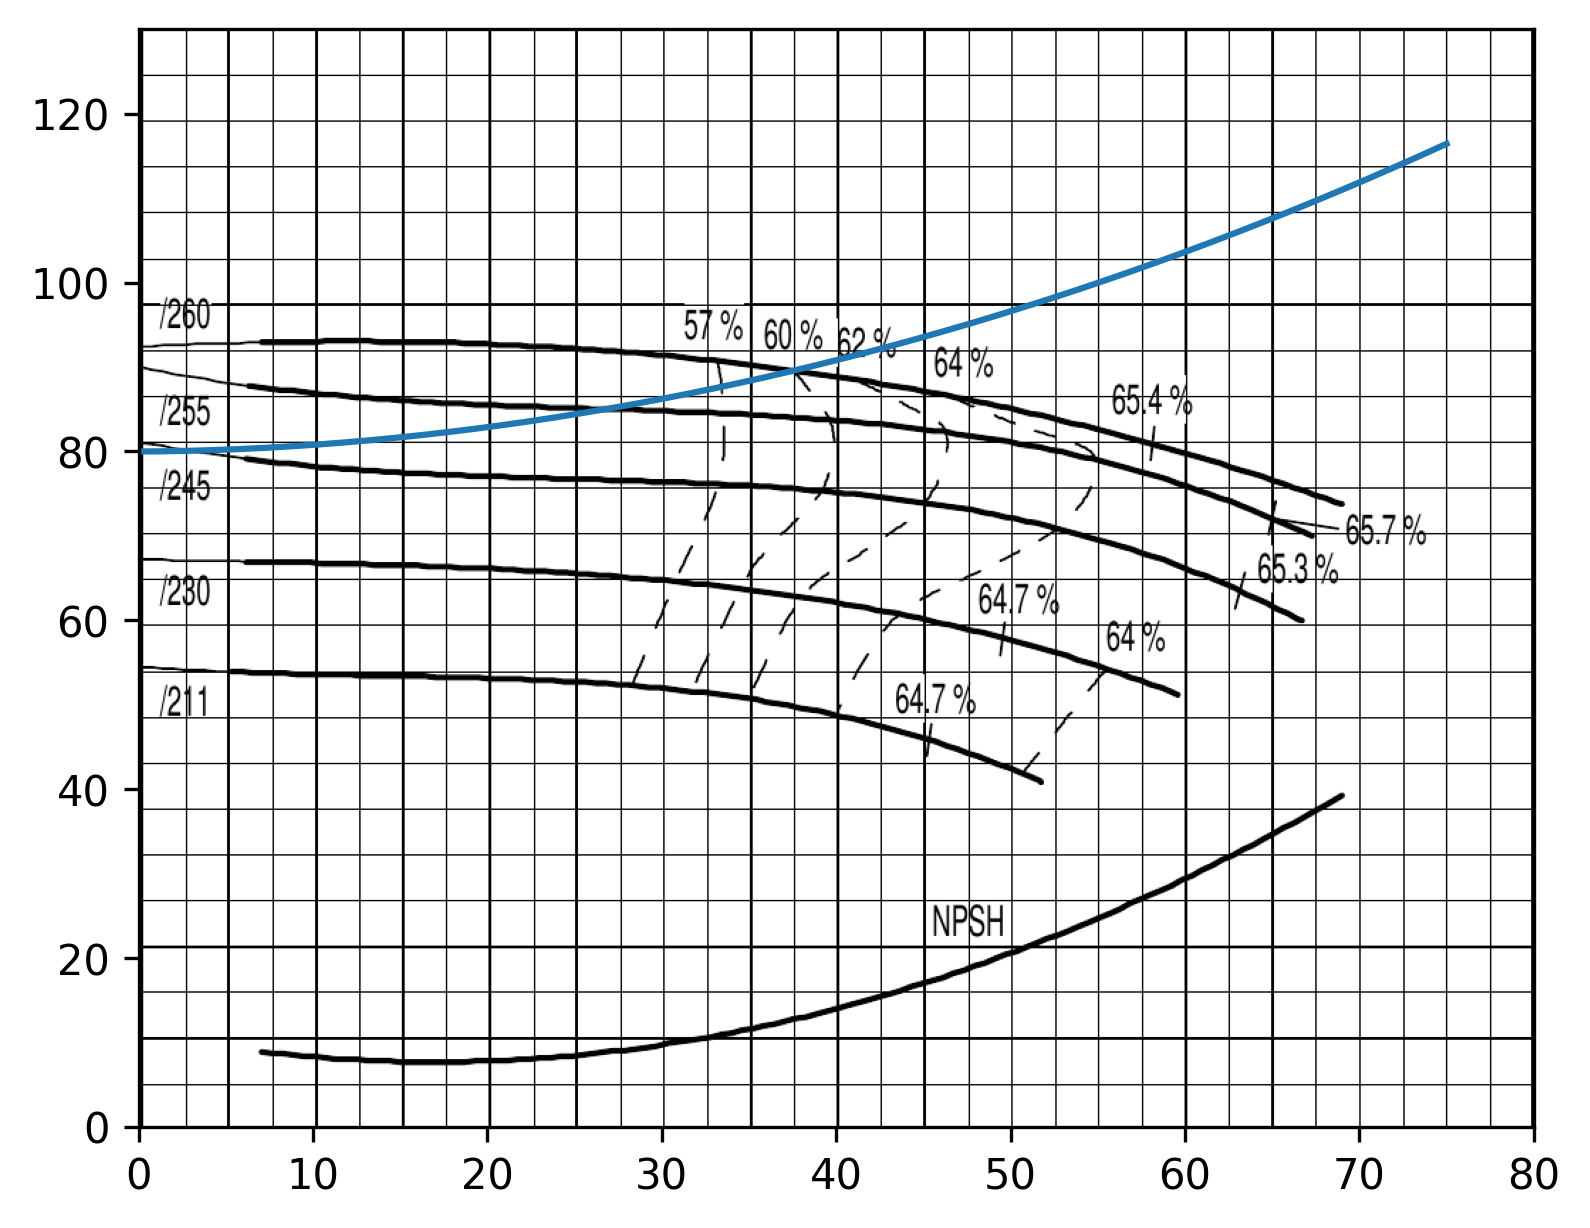

In [18]:
#Grafico
xmin=0
xmax=80
ymin=0
ymax=130

file_name="40-250.png"

img = plt.imread(file_name)
y2x=len(img)/(len(img[0]))
fig = plt.figure(dpi=300,figsize=(6,6*y2x))
ax = fig.add_subplot(111)
ax.imshow(img,extent=[xmin,xmax,ymin,ymax],aspect='auto')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

#curva

q = np.linspace(0.1,75,200)
q = np.multiply(q,1/3600)
ha = []
for i in q:
    ha.append(ha_func(i))
q = np.multiply(q,3600)

ax.plot(q,ha)
plt.show()

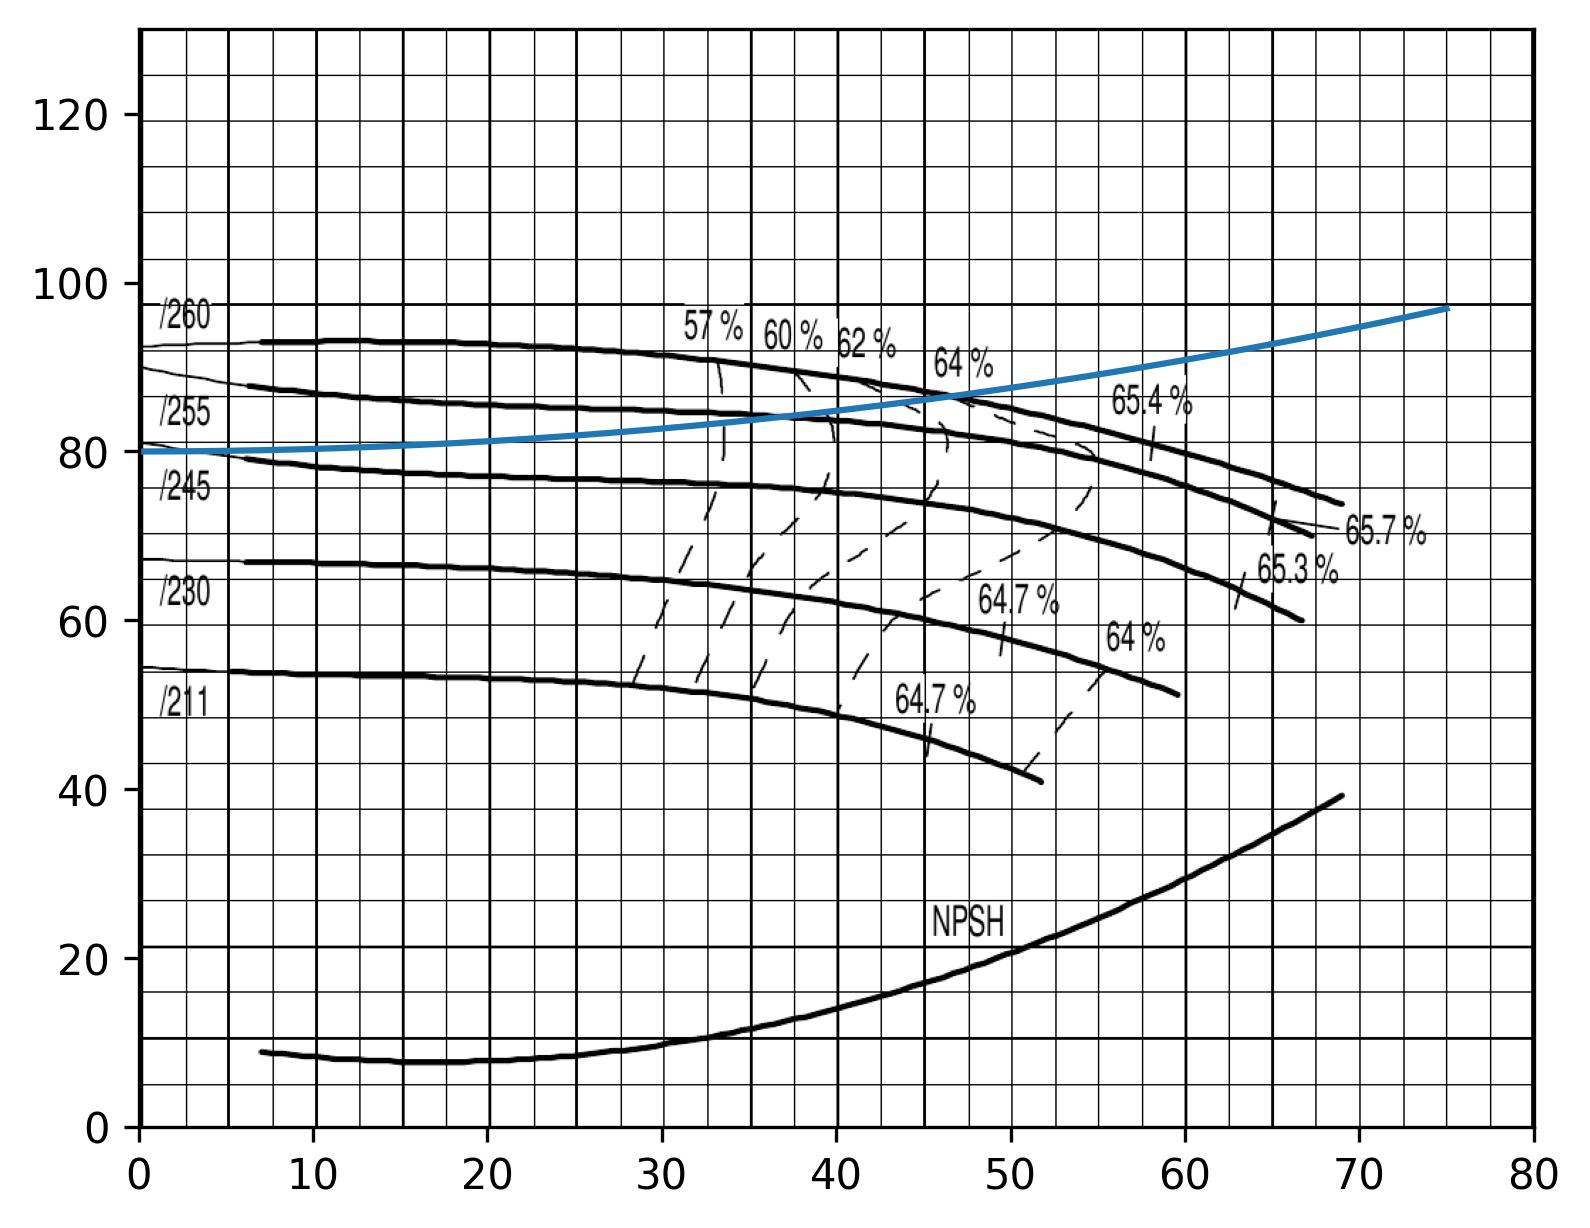

In [9]:
#bomba: N 40-250

Ds = 62.7 *10**-3 # m
Ats = Ds**2*np.pi/4
Dd1 = 40.9 * 10**-3 # Diametro de la descarga de la bomba: se requiere 
Atd1 = Dd1**2*np.pi/4

Dd = 102.3 *10**-3 # m
Atd = Dd**2*np.pi/4

Ls = 2 # m
Ld = 400 # m

e = 4.6*10**-5 #m
e_dd = e/Dd # rugosidad relativa linea de descarga
e_ds = e/Ds # rugosidad relativa linea de succion

g=9.81 # m/s2
mu = 10**-3 # Pa.s
rho = 10**3 # kg/m3
Q = 800*10**-3/60 # m3/s
za = 0
zb = 80 # m

def ha_func(q):
    
    vd1 = q /Atd1
    vd = q/Atd
    vs = q/Ats


    # perdidas mayores
    # succion
    Res = rho*vs*Ds/mu
    fs = coleb(Res,e_ds)
    hls = vs**2/2/g*fs/Ls/Ds

    # descarga
    
    Red = rho*vd*Dd/mu
    fd = coleb(Red,e_dd)
    hld = vd**2/2/g*fd/Ld/Dd
    
    #total
    hl = hld+hls
    
    # perdidas menores
    # succion
    fts = cole_turb(e_ds)
    k1 = 75*fts
    k2 = 30*fts
    
    hlms = vs**2/2/g*(k1+k2)
    
    # descarga
    ftd = cole_turb(e_dd)
    k3 = 30*ftd
    k4=100*ftd
    k5 = 900*ftd
    k6=30*ftd
    k7 = 1
    k8 = 0.48
    
    hlmd = vd**2/2/g*(k3+k4+k5+k6+k7)+vd1**2/2/g*k8
    
    #total
    hlm = hlms+hlmd

    
    ha = zb-za+hl+hlm
    return ha

ha_req = ha_func(Q)

#Grafico
xmin=0
xmax=80
ymin=0
ymax=130

file_name="40-250.png"

img = plt.imread(file_name)
y2x=len(img)/(len(img[0]))
fig = plt.figure(dpi=300,figsize=(6,6*y2x))
ax = fig.add_subplot(111)
ax.imshow(img,extent=[xmin,xmax,ymin,ymax],aspect='auto')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

#curva

q = np.linspace(0.1,75,200)
q = np.multiply(q,1/3600)
ha = []
for i in q:
    ha.append(ha_func(i))
q = np.multiply(q,3600)

ax.plot(q,ha)
plt.show()

In [10]:
pot = 49.5/3600*85.28*9.81/0.64
print(pot)

17.973759375000004
